In [20]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
rtest = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')

In [21]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=123)
X = X.toarray()

X_test, y_test = load_svmlight_file(f=BytesIO(rtest.content), n_features=123)
X_test = X_test.toarray()

In [22]:
import numpy as np

# preprocess
n_samples, n_features = X.shape
X_train = np.column_stack((X, np.ones((n_samples, 1))))

X_test = np.column_stack((X_test, np.ones((X_test.shape[0], 1))))

y_train = np.where(y==1, y, 0)
y_test = np.where(y_test==1, y_test, 0)
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [23]:
learning_rate = 0.005
max_epoch = 500
batch_size = 256
threshold = 0.5

losses_train = []
losses_val = []
val_acc = []

In [24]:
# select different initializing method
#w = np.zeros((n_features + 1, 1))  # initialize with zeros
w = np.random.random((n_features + 1, 1))  # initialize with random numbers
#w = np.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [25]:
def sigmoid(data):
    return 1/(1+np.exp(-data))

def predict(data):
    return sigmoid(np.dot(data, w))

def getLoss(pre, label):
    -np.mean(label*np.log(pre)+(1-label)*(np.log(1-pre)))

In [28]:
for epoch in range(max_epoch):
    
    # predict and get train loss
    pre = predict(X_train)
    loss_train = getLoss(pre, y_train)
    losses_train.append(loss_train)
    #print(pre)
    #print(y_train)
    
    # predict and get test loss
    test_pre = predict(X_test)
    loss_val = getLoss(test_pre, y_test)
    losses_val.append(loss_val)
    test_pre = np.where(test_pre>=threshold, 1, 0)
    acc = np.mean(test_pre==y_test)
    val_acc.append(acc)
    # update parameters
    
    choice_index = np.random.choice(n_samples, batch_size)
    selected_predict = pre[choice_index]
    selected_y = y_train[choice_index]
    selected_X = X_train[choice_index]
    G = ((selected_predict - selected_y).T.dot(selected_X))/batch_size  # calculate the gradient

    G = -G.T
    w += learning_rate * G  # update the parameters


In [29]:
print(val_acc)

[0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.2362262760

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

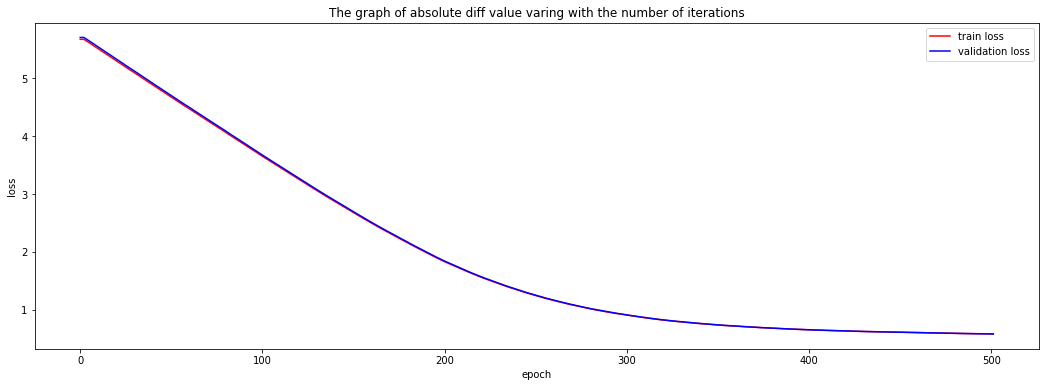

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")

Text(0.5,1,'The graph of test acc value varing with the number of iterations')

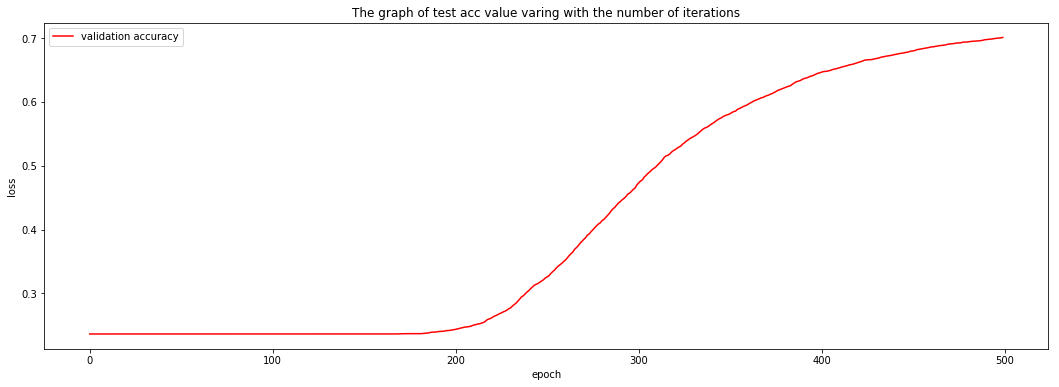

In [32]:

plt.figure(figsize=(18, 6))
plt.plot(val_acc, "-", color="r", label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of test acc value varing with the number of iterations")